<a href="https://colab.research.google.com/github/sdascoli/boolformer/blob/main/Boolformer_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install boolformer
import numpy as np
import boolformer
from boolformer import load_boolformer, get_data_pmlb, run_models, get_logical_circuit, generate_data

# Noiseless model
Use this model to predict logical circuits when you have access to the whole truth table. Can only handle input dimension up to 10

In [2]:
boolformer_noiseless = load_boolformer(mode='noiseless')

Downloading...
From: https://drive.google.com/uc?id=1cULlE16yKBqUZMMGv7CC5fgHXXJ7OQQQ
To: /content/boolformer_noiseless.pt
100%|██████████| 275M/275M [00:04<00:00, 64.7MB/s]


Loaded noiseless model


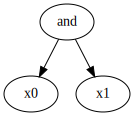

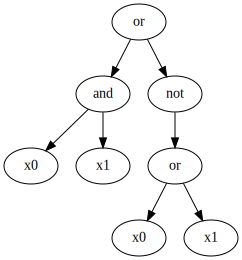

In [5]:
inputs = np.array([
    [False, False],
    [False, True ],
    [True , False],
    [True , True ],
])
outputs1 = np.array([False, False, False, True])
outputs2 = np.array([True, False, False, True])
inputs = [inputs, inputs]
outputs = [outputs1, outputs2]
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=10, beam_type="search")

for pred_tree in pred_trees:
    display(pred_tree.graphviz())

Error, complexity: [0.0, 0.0, 0.0, 0.0], [1, 1, 5, 2]
Predicted trees: 


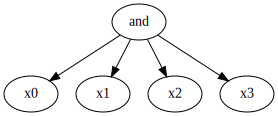

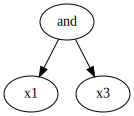

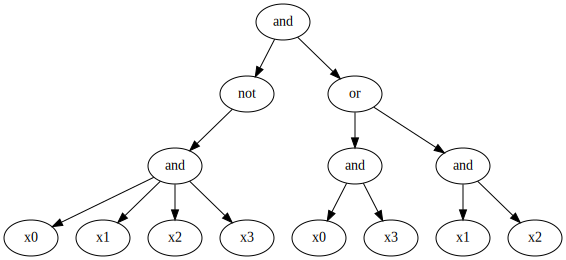

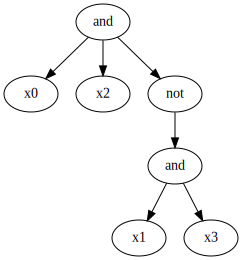

In [8]:
tree, n_vars = get_logical_circuit(function_name='multiplier_2')
inputs, outputs, val_inputs, val_outputs = generate_data(tree, n_vars=n_vars, n_points=None)
pred_trees, error_arr, complexity_arr = boolformer_noiseless.fit(inputs, outputs, verbose=False, beam_size=50, beam_type="search")

print(f"Error, complexity: {error_arr}, {complexity_arr}")
print("Predicted trees: ")
for pred_tree in pred_trees:
    display(pred_tree.graphviz())

# Noisy model
Use this model to predict a boolean function which approximates a set of (possibly noisy observation) with up to 80 input variables (but only up to 6 active variables)

In [ ]:
boolformer_noisy = load_boolformer('noisy')

Downloading...
From: https://drive.google.com/uc?id=1IFSc_sHfiTckMy-cwggvVMBH1YgXas8G
To: /content/boolformer_noisy.pt
100%|██████████| 543M/543M [00:14<00:00, 37.1MB/s]


Loaded noisy model


## PMLB

F1 scores : 
RandomForestClassifier_1       : 0.988109881098811
RandomForestClassifier_100     : 0.9938280071320806
LogisticRegression             : 0.9615651449979187
Boolformer                     : 0.9569620253164557


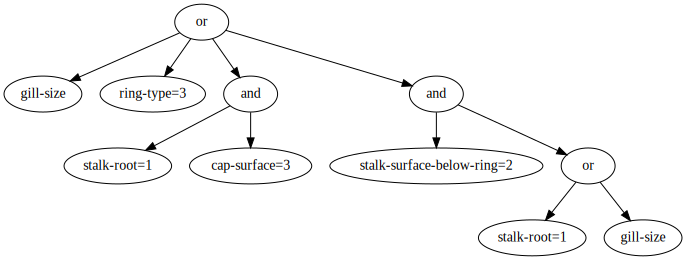

In [ ]:
dataset_name = 'mushroom' # choose one of the PMLB datasets.

(inputs, outputs, val_inputs, val_outputs, dictionary) = get_data_pmlb(dataset_name)
acc, f1, tree = run_models(boolformer_noisy, inputs, outputs, val_inputs, val_outputs, beam_size=20)

print("F1 scores : ")
for method_name, f1_score in f1.items():
    print(f"{method_name:30s} : {f1_score}")
tree.relabel_variables(dictionary)
display(tree.graphviz())